In [258]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib

In [259]:
def sigmoid(x):
    return 1/(1+np.exp(-1*x))

In [260]:
def calc_cost(y, X, params):
    m = len(y)
    hx = sigmoid(X@params)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log((hx) + epsilon)) - ((1-y).T @ np.log((1-hx) + epsilon)))
    return cost


In [261]:
def gradient_descent(y, X, params, learning_rate=0.001, num_iters=500):
    m = len(y)
    j_history = np.zeros((num_iters, 1))
    
    for i in range(num_iters):
        dj = (1/m) * X.T @ (sigmoid(X @ params) - y)
        params = params - learning_rate * dj
        j_history[i] = calc_cost(y, X, params)
    
    return (params, j_history)

In [262]:
def predict(X, params):
    return np.round(sigmoid(X @ params))

In [263]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

In [264]:
y_orig = y.copy()
X_orig = X.copy()

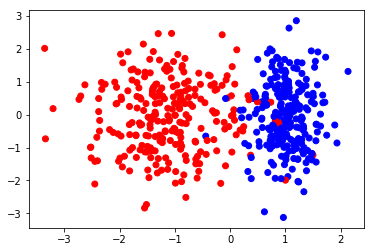

In [265]:
colors = ['red', 'blue']
plt.scatter(X_plt[:,0], X_plt[:,1], c=y_plt, cmap=matplotlib.colors.ListedColormap(colors))

In [266]:
y = y[:,np.newaxis]

In [267]:
m = len(y)

X = np.concatenate((np.ones((m,1)), X), axis = 1)

n = X.shape[1]

params = np.zeros((n, 1))

initial_cost = calc_cost(y, X, params)
print('initial cost: {}'.format(initial_cost))

initial cost: [[0.69312718]]


In [268]:
optimal_params, cost_history = gradient_descent(y, X, params, learning_rate=0.03, num_iters=1500)

In [269]:
print("final parameters: {}".format(optimal_params))

final parameters: [[-0.45293068]
 [ 3.26552327]
 [ 0.03334871]]


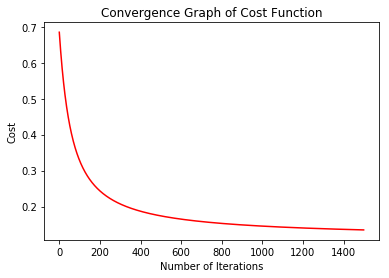

In [270]:
plt.plot(range(len(cost_history)), cost_history, 'r')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

## Logistic Regression Class

In [271]:
class LogisticRegression:
            
    def __init__(self,):
        self.initial_cost = None
        self.cost_history = []
        self.optimized_params = None
    
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def cal_cost(self, X, y, params):
        m = len(y)
        epsilon = 1e-8
        hx = sigmoid(X@params)
        cost = (-1/m)*((y.T @ np.log(hx+epsilon))+((1-y).T@np.log((1-hx)+epsilon)))
        return cost, hx
    
    def normalize(self, X):
        mu = np.mean(X,0)
        sigma = np.std(X,0)
        norm_X = (X-mu)/sigma
        return norm_X
    
    def fit(self, X, y, learning_rate=0.03, num_iterations=1500):
        lr = learning_rate
        m = len(y)
#         X = self.normalize(X)
        X = np.concatenate((np.ones((m,1)), X), axis = 1)
        
        n = X.shape[1]
        params = np.zeros((n,1))
        
        print(X.shape)
        print(y.shape)
        print(params.shape)
        
        self.initial_cost = self.cal_cost(X, y, params)
        print('initial cost: {}'.format(initial_cost))
        self.cost_history.append(initial_cost)
        
        for i in range(num_iterations):
            
            # Updating dates
#             dW = (1/m)*(X.T)@(sigmoid(X@params) - y)
            dW = (1/m) * X.T @ (sigmoid(X @ params) - y)
            print(dW.shape)
            params -= lr * dW
            
            #Forward Propogation
            iteration_cost, y_bar = self.cal_cost(X, y, params)
            if i%100 == 0:
                print('Iteration: {}, Cost: {}'.format(i+1, iteration_cost))
            
            self.cost_history.append(iteration_cost[0])
        
        self.optimized_params = params
        
    def predict(self, X_new):
        X_new = np.concatenate((np.ones((m,1)), X_new), axis = 1)
        return self.sigmoid(X_new@self.optimized_params)
        
        

In [272]:
clf = LogisticRegression()
clf.fit(X_orig, y)

(500, 3)
(500, 1)
(3, 1)
initial cost: [[0.69312718]]
(3, 1)
Iteration: 1, Cost: [[0.68468609]]
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
Iteration: 101, Cost: [[0.32792469]]
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)

(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
Iteration: 1201, Cost: [[0.14046564]]
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3,

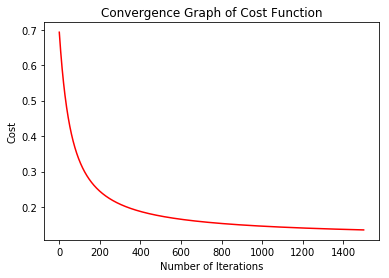

In [273]:
plt.plot(range(len(clf.cost_history)), clf.cost_history, 'r')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [275]:
y_pred = clf.predict(X_orig)

In [276]:
acc = float(sum(np.round(y_pred)==y))/float(len(y))

print("Accuracy on train set: {}%".format(np.round(acc*100,2)))

Accuracy on train set: 96.6%


In [277]:
clf.optimized_params

array([[-0.45293068],
       [ 3.26552327],
       [ 0.03334871]])

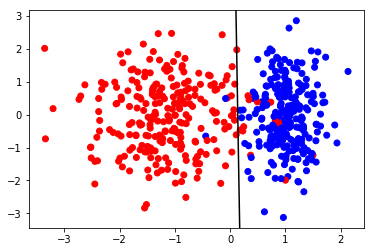

In [278]:
# PLotting the decision  boundary
slope = -(clf.optimized_params[1]/clf.optimized_params[2])
intercept = -(clf.optimized_params[0]/clf.optimized_params[2])

colors = ['red', 'blue']
plt.scatter(X_plt[:,0], X_plt[:,1], c=y_plt, cmap=matplotlib.colors.ListedColormap(colors))

ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k")



In [ ]:
intercept